Final Project Submission
Please fill out:

Student name: Martin Murimi
Student pace:  full time
Scheduled project review date/time:
Instructor name: Antonny Muiko
Blog post URL:

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd


'c:\\Users\\USER\\Documents\\Flatiron\\project phase1\\phase-1-project-1'

In [3]:
#Loading the Data
aviation_df=pd.read_csv('AviationData.csv',encoding='windows-1252',low_memory=False)
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Analyzing the data set
aviation_df.isnull().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [5]:
#Dropping columns that have more than 50% values missing
aviation_df.drop(columns=['Latitude', 'Longitude', 'Airport.Name', 'Airport.Code', 'Aircraft.Category', 'FAR.Description','Schedule','Air.carrier',], inplace=True)

In [6]:
#Analyzing the cleaned data
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

In [19]:
# Dropping duplicate values using our primary keys(event ID and Accident ID)
aviation_df= aviation_df.drop_duplicates( subset = ['Event.Id', 'Accident.Number'], keep = 'last').reset_index(drop = True) 
aviation_df.shape

(88863, 23)

In [7]:
# Replacing missing data(numerical) with median
aviation_df['Total.Fatal.Injuries'].fillna(aviation_df['Total.Fatal.Injuries'].median(), inplace=True)
aviation_df['Total.Serious.Injuries'].fillna(aviation_df['Total.Serious.Injuries'].median(), inplace=True)
aviation_df['Total.Minor.Injuries'].fillna(aviation_df['Total.Minor.Injuries'].median(), inplace=True)
aviation_df['Total.Uninjured'].fillna(aviation_df['Total.Uninjured'].median(), inplace=True)
aviation_df['Number.of.Engines'].fillna(aviation_df['Number.of.Engines'].median(), inplace=True)

In [8]:
# Replacing missing data(categorical) with mode
aviation_df['Make'].fillna(aviation_df['Make'].mode()[0], inplace=True)
aviation_df['Model'].fillna(aviation_df['Model'].mode()[0], inplace=True)
aviation_df['Investigation.Type'].fillna(aviation_df['Investigation.Type'].mode()[0], inplace=True)
aviation_df['Injury.Severity'].fillna(aviation_df['Injury.Severity'].mode()[0], inplace=True)
aviation_df['Aircraft.damage'].fillna(aviation_df['Aircraft.damage'].mode()[0], inplace=True)
aviation_df['Amateur.Built'].fillna(aviation_df['Amateur.Built'].mode()[0], inplace=True)
aviation_df['Engine.Type'].fillna(aviation_df['Engine.Type'].mode()[0], inplace=True)
aviation_df['Purpose.of.flight'].fillna(aviation_df['Purpose.of.flight'].mode()[0], inplace=True)
aviation_df['Weather.Condition'].fillna(aviation_df['Weather.Condition'].mode()[0], inplace=True)
aviation_df['Broad.phase.of.flight'].fillna(aviation_df['Broad.phase.of.flight'].mode()[0], inplace=True)
aviation_df['Report.Status'].fillna(aviation_df['Report.Status'].mode()[0], inplace=True)


In [9]:
#analyzed data after changes
aviation_df.isnull().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity               0
Aircraft.damage               0
Registration.Number        1317
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13771
dtype: int64

In [10]:
# Drop more unneccesary columns based on my data and business problem
aviation_df.drop(columns=['Publication.Date'])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Substantial,N1867H,PIPER,...,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Probable Cause
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Non-Fatal,Substantial,N2895Z,BELLANCA,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Non-Fatal,Substantial,N210CU,CESSNA,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause


In [11]:
aviation_df.shape

(88889, 23)

In [12]:
aviation_df['Make'].value_counts()

Cessna              22290
Piper               12029
CESSNA               4922
Beech                4330
PIPER                2841
                    ...  
WRIGHT BRUCE M          1
HUSTON CHARLES D        1
ROBERT GOLDING          1
Gilpatrick              1
Gadbois                 1
Name: Make, Length: 8237, dtype: int64

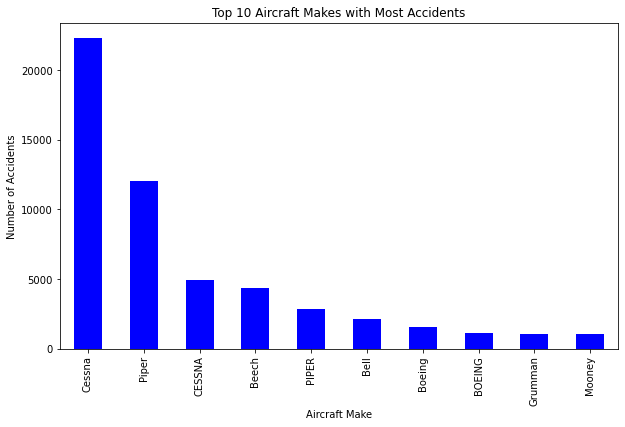

In [13]:
# lets see which aircraft make has been in most accidents

#Grouping by 'Make' and counting accidents
accidents_by_make = aviation_df['Make'].value_counts()

#Selecting the top 10 makes with the most accidents
top_10_makes = accidents_by_make.head(10)

#Plotting a bar chart
plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar', color='blue')
plt.title('Top 10 Aircraft Makes with Most Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.show()

In [14]:
# some makes are duplicated, (lower & Uppercase), we therefore combine the data
aviation_df['Make']= aviation_df['Make'].str.upper()

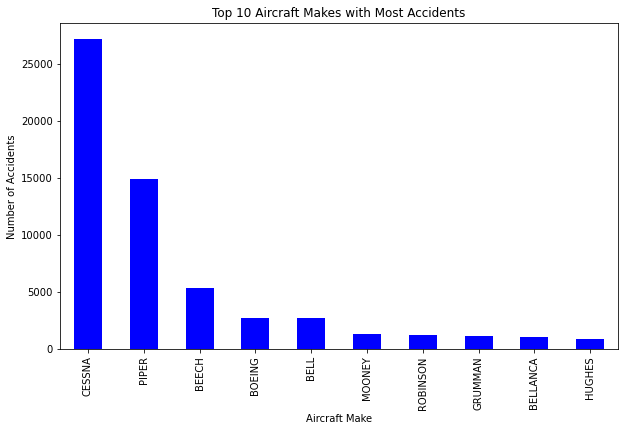

In [15]:
accidents_by_make = aviation_df['Make'].value_counts()
top_10_makes = accidents_by_make.head(10)

plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar', color='blue')
plt.title('Top 10 Aircraft Makes with Most Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.show()

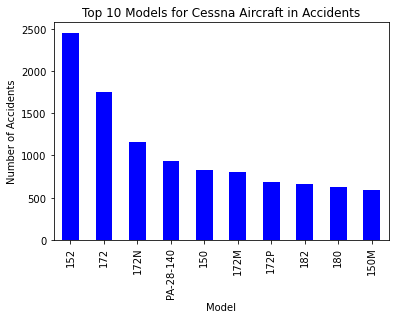

In [16]:
# checking number of accident for CESSNA model
CESSNA_data = aviation_df[aviation_df['Make'] == 'CESSNA']

top_10_models = aviation_df['Model'].value_counts().head(10)

top_10_models.plot(kind='bar', color='blue')

plt.title('Top 10 Models for Cessna Aircraft in Accidents')
plt.xlabel('Model')
plt.ylabel('Number of Accidents')
plt.show()

In [17]:
#the data is now ready for vizualization
aviation_df.to_csv("aviation_final.csv",index=False)

